# Create Mean Image

In [1]:
from os import listdir
from os.path import isdir, join
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Normalize array from 0 to 1
def normalize(target_array):
    target_array -= target_array.min()
    normalized_array = np.divide(target_array, target_array.max())
    return normalized_array


In [3]:
# Set path to registered images folder and import nii into python
data_dir = "./training-set/registration-results/affine+bspline/"
onlydirs = [f for f in listdir(data_dir) if isdir(join(data_dir, f))]

mean_im = None

for dir in onlydirs:
    im = join(data_dir, dir,'result.1.nii.gz')
    nii_img = nib.load(im)
    nii_data = nii_img.get_data()
    nii_data = normalize(nii_data)
    
#     print(nii_data.min())
#     print(nii_data.max())
#     plt.imshow(nii_data[:,:,150], cmap = "gray")
#     plt.show()
    
    if mean_im is None:
        # Array definitions to store the label counts
        mean_im = np.zeros_like(nii_data)
    
    mean_im += nii_data

# Divide by number of training images
mean_im = np.divide(mean_im, len(onlydirs))

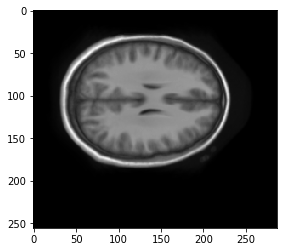

In [4]:
plt.imshow(mean_im[:,:,150], cmap = "gray")
plt.show()

In [36]:
segment_nii = nib.Nifti1Image(mean_im, nii_img.affine, nii_img.header)
nib.save(segment_nii, 'mean_im.nii.gz')

## Normalize MNI template image

In [4]:
mni_template_path = "./MNITemplateAtlas-old/template.nii.gz"
min_template_out_path = "./MNITemplateAtlas/template.nii.gz"

our_template_path = "./our_atlas/mean_im.nii"
our_template = nib.load(our_template_path)
mni_template = nib.load(mni_template_path)
mni_template_data = normalize(mni_template.get_data())

# try our header instead
# we need to compare mni template with the images that we have (in itk-snap or python) and see
# whether we have different values in image registration properties (how itk transforms the image if it does it
# at all)
segment_nii = nib.Nifti1Image(mni_template_data, our_template.affine, our_template.header)
nib.save(segment_nii, min_template_out_path)